In [151]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 
import cartopy.crs as ccrs
import cmocean 
import pandas as pd
import cftime

In [152]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 
plt.style.use("dark_background") 

In [49]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'

In [50]:
heat_content_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc'
heat_content_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc'
halosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-2000_yearly.nc'
halosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-700_yearly.nc'
thermosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-2000_yearly.nc'
thermosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-700_yearly.nc'
steric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc'
steric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc'


In [51]:
heat_content_0_2000 = xr.open_dataset(heat_content_0_2000_path, decode_times=False)
heat_content_0_700 = xr.open_dataset(heat_content_0_700_path, decode_times=False)
halosteric_sea_level_0_2000 = xr.open_dataset(halosteric_sea_level_0_2000_path, decode_times=False)
halosteric_sea_level_0_700 = xr.open_dataset(halosteric_sea_level_0_700_path, decode_times=False)
thermosteric_sea_level_0_2000 = xr.open_dataset(thermosteric_sea_level_0_2000_path, decode_times=False)
thermosteric_sea_level_0_700 = xr.open_dataset(thermosteric_sea_level_0_700_path, decode_times=False)
steric_sea_level_0_2000 = xr.open_dataset(steric_sea_level_0_2000_path, decode_times=False)
steric_sea_level_0_700 = xr.open_dataset(steric_sea_level_0_700_path, decode_times=False)


In [153]:
heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 nan nan ... 0.1314
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [200]:
time_0_2000 = heat_content_0_2000['time'].values
base_year = 2005
time_as_years_0_2000 = base_year + (time_0_2000 / 12)
print(time_as_years_0_2000[:18])

[2055.5 2056.5 2057.5 2058.5 2059.5 2060.5 2061.5 2062.5 2063.5 2064.5
 2065.5 2066.5 2067.5 2068.5 2069.5 2070.5 2071.5 2072.5]


In [201]:
# Global average OHC for 0-2000m
heat_content_2000_global = heat_content_0_2000['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
time_years = np.floor(heat_content_0_2000['time'].values).astype(int) 
trend_2000_slope = (heat_content_2000_global[-1] - heat_content_2000_global[0]) / (time_years[-1] - time_years[0])
print(f"Trend 0-2000m (Global): {trend_2000_slope:.2f} units/year")

Trend 0-2000m (Global): 0.02 units/year


In [202]:
# Define regions
regions = {
    'Northern Hemisphere': 'yearl_h22_NH',
    'Southern Hemisphere': 'yearl_h22_SH',
    'Atlantic Ocean': 'yearl_h22_AO',
    'Pacific Ocean': 'yearl_h22_PO',
    'Indian Ocean': 'yearl_h22_IO'
}

Northern Hemisphere Trend: 0.03 units/year
Southern Hemisphere Trend: 0.06 units/year
Atlantic Ocean Trend: 0.03 units/year
Pacific Ocean Trend: 0.03 units/year
Indian Ocean Trend: 0.02 units/year


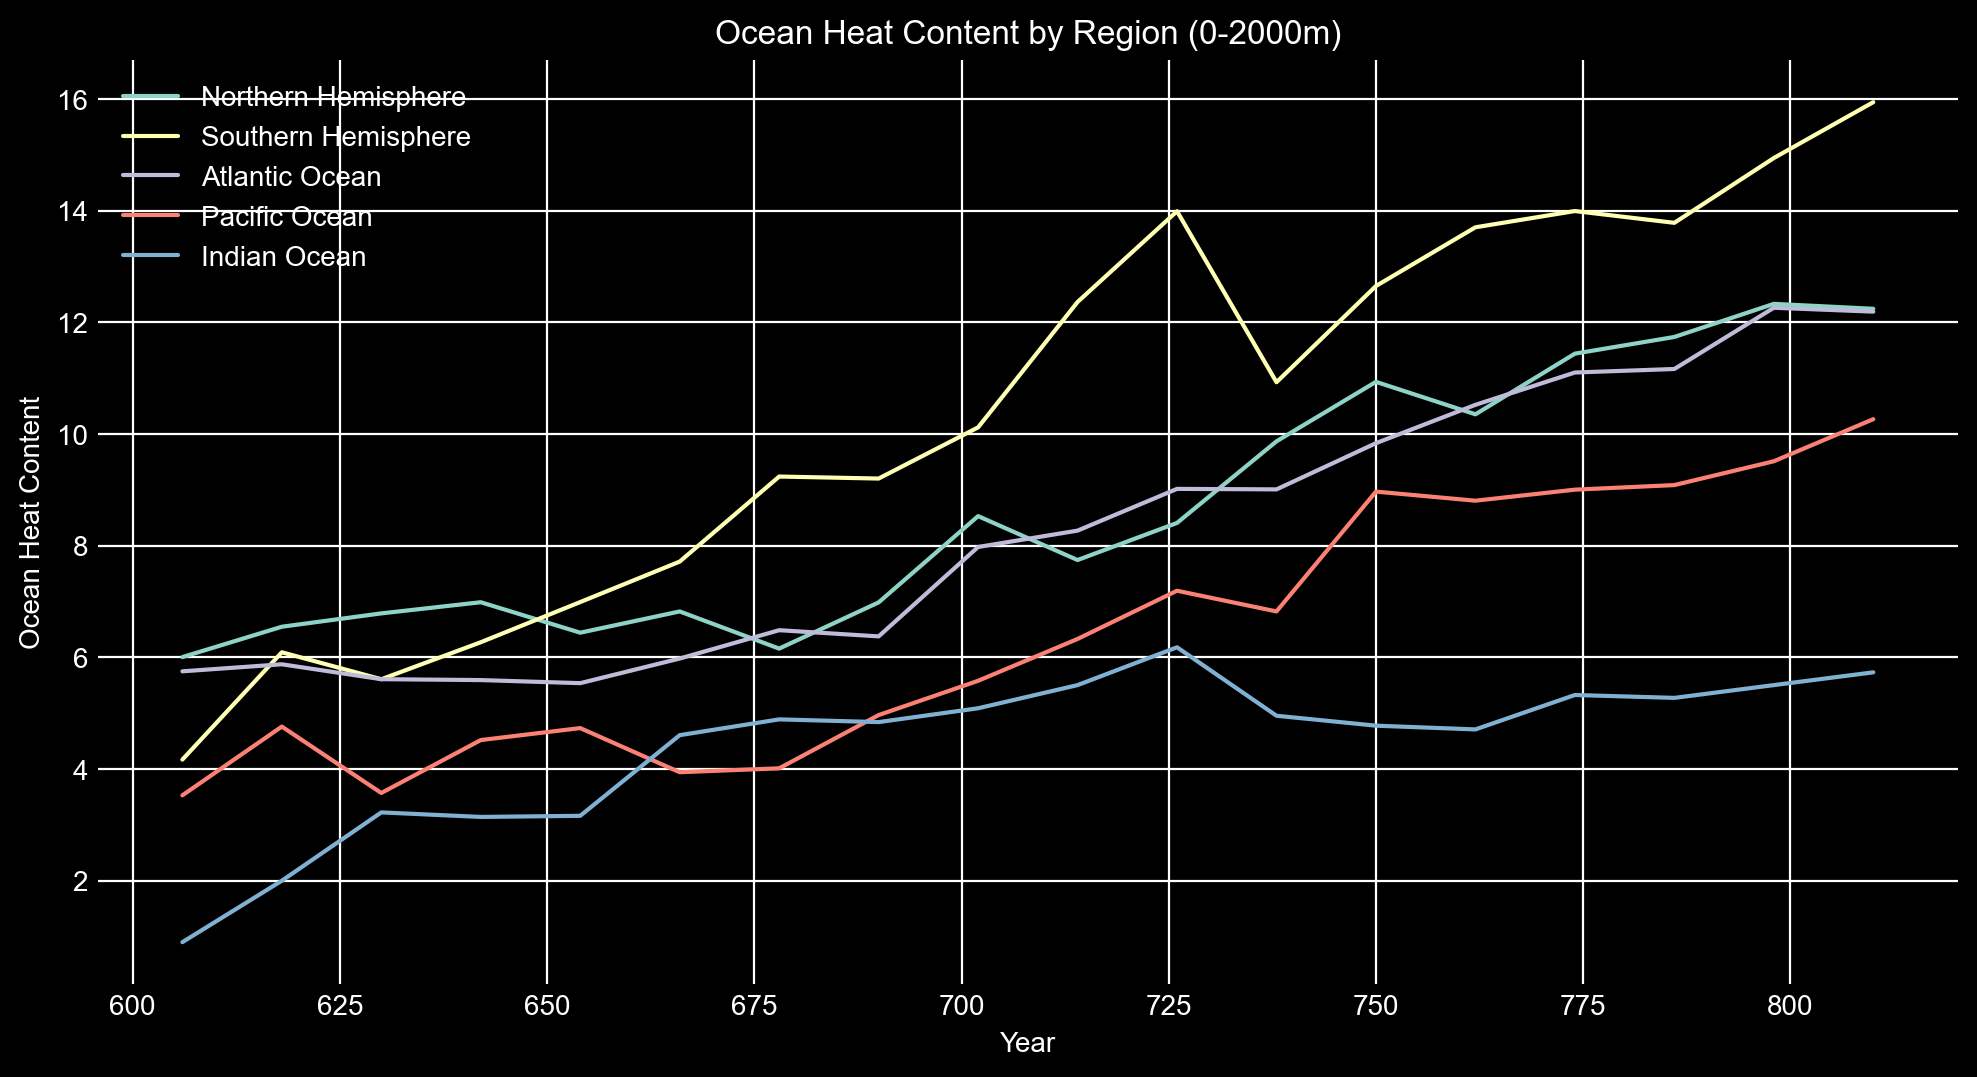

In [203]:
# Initialize the plot
plt.figure(figsize=(12, 6))

for region, var in regions.items():
    regional_data = heat_content_0_2000[var].values
    plt.plot(time_years, regional_data, label=region)
    regional_trend = (regional_data[-1] - regional_data[0]) / (time_years[-1] - time_years[0])
    print(f"{region} Trend: {regional_trend:.2f} units/year")

plt.xlabel("Year")
plt.ylabel("Ocean Heat Content")
plt.title("Ocean Heat Content by Region (0-2000m)")
plt.legend()
plt.grid(True)
plt.show()

In [167]:
time_values = heat_content_0_2000['time'].values  
time_as_years = 1955 + (time_values - time_values[0]) / 12  
heat_content_avg_values = heat_content_avg.values

In [168]:
heat_content_0_2000_var = heat_content_0_2000['h18_hc']

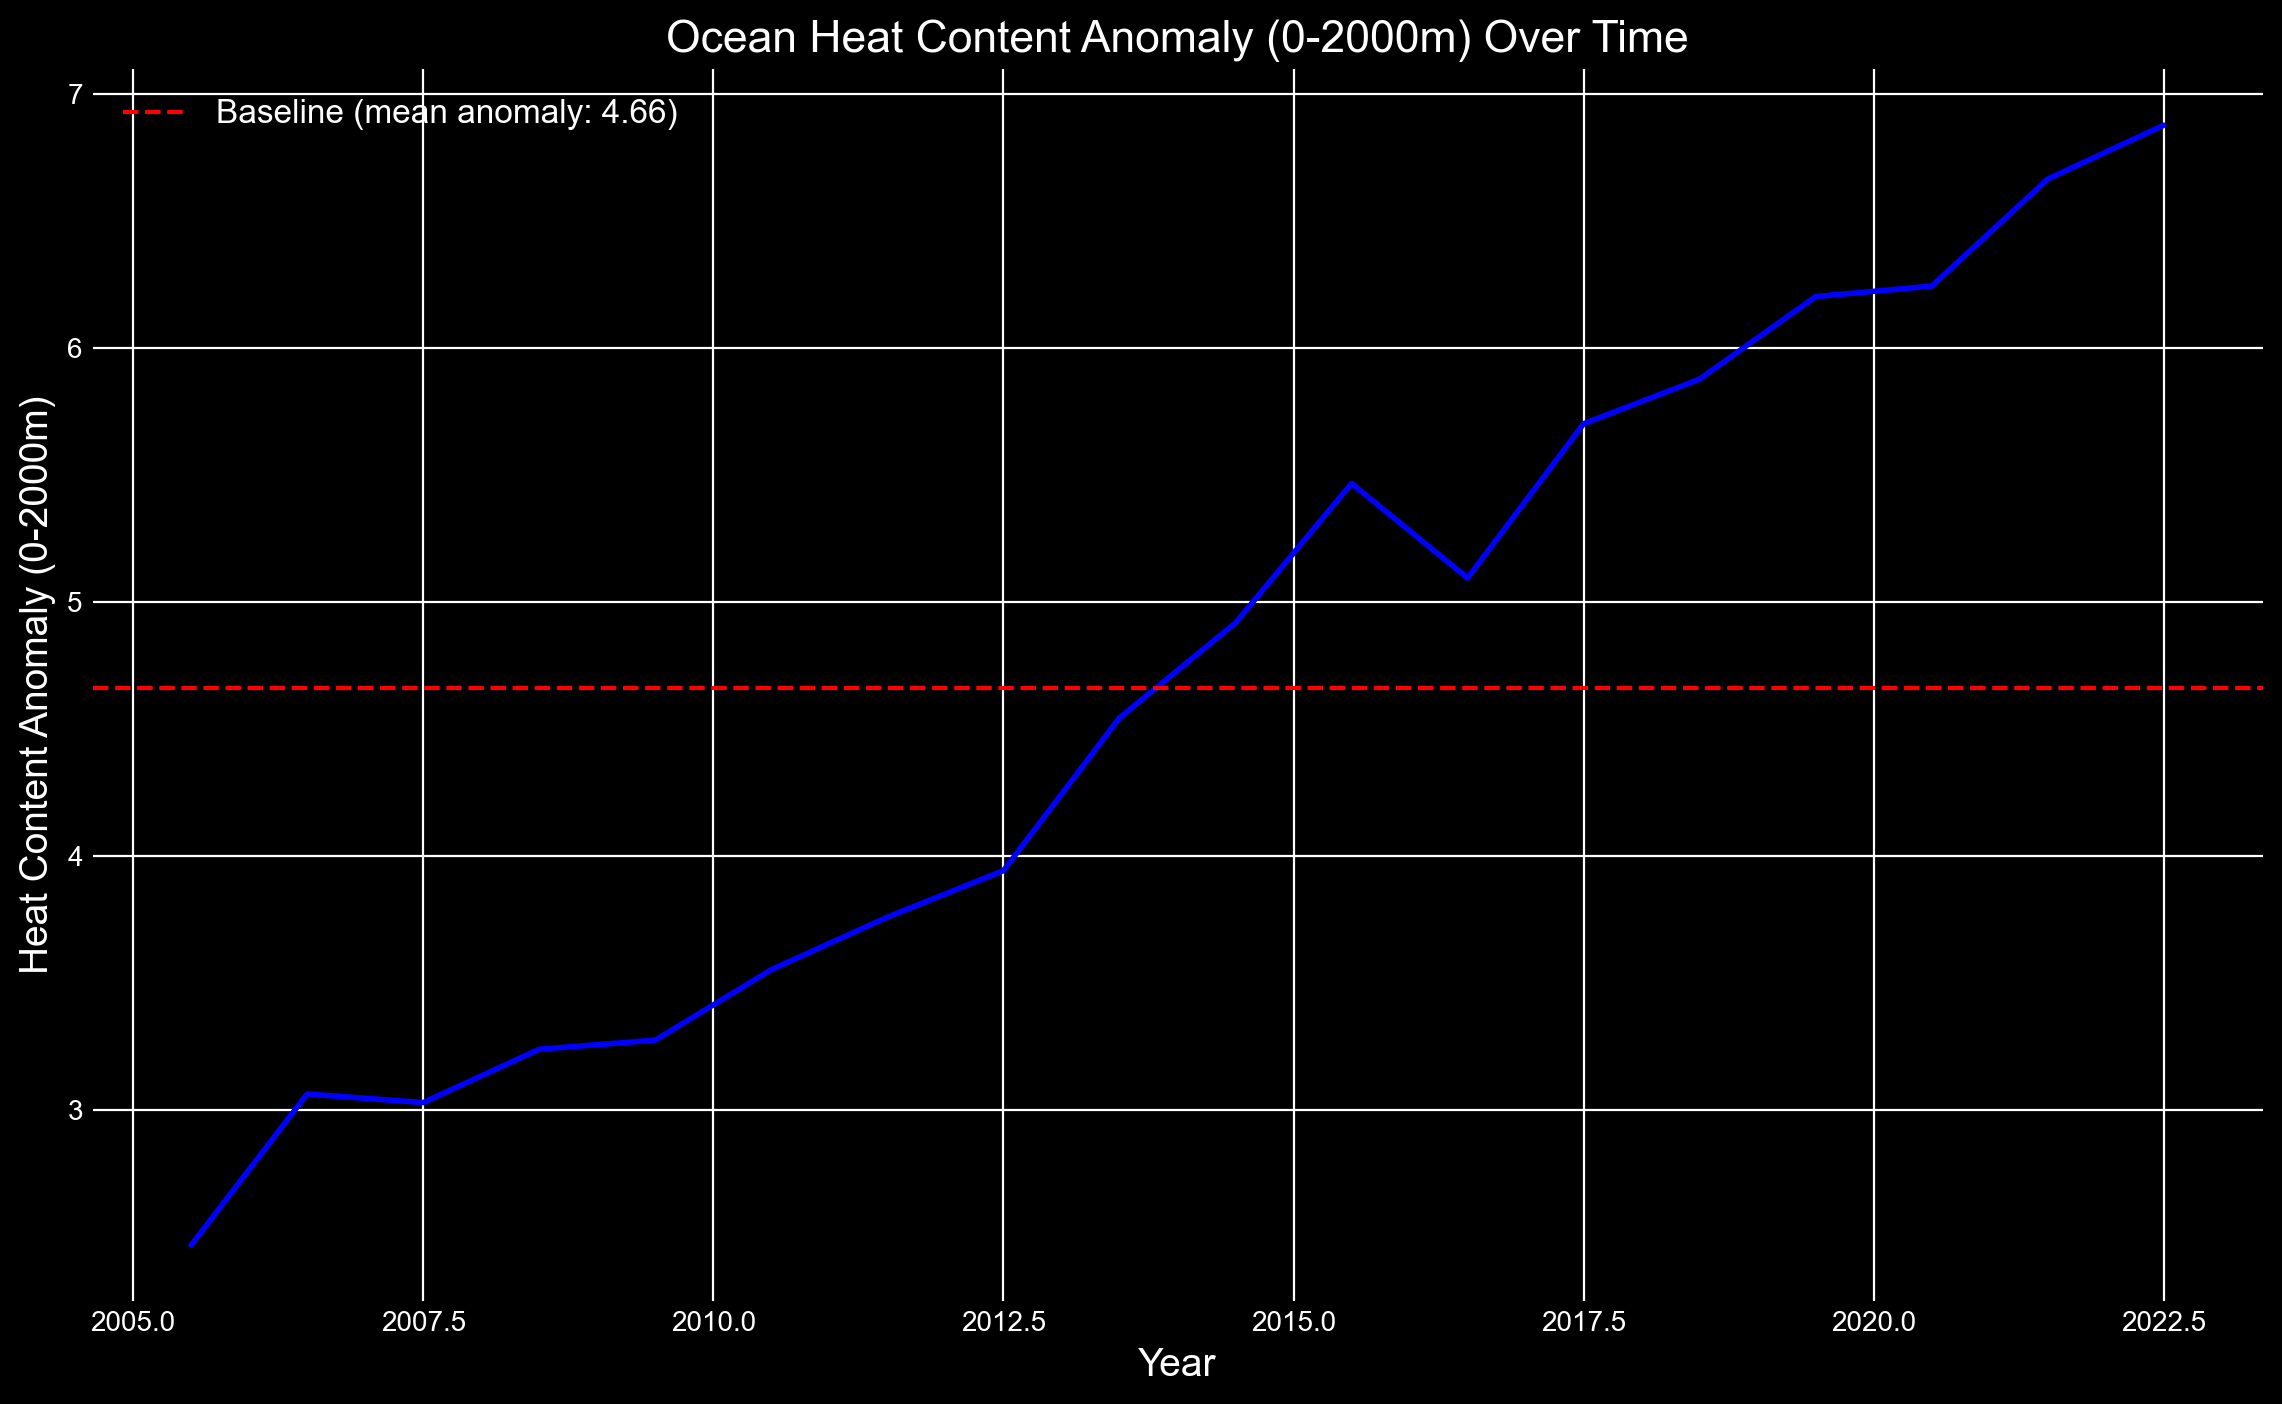

In [204]:
heat_content_avg = heat_content_0_2000['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
time_as_years = 1955 + (heat_content_0_2000['time'] / 12) 
heat_content_avg_values = heat_content_avg.values

plt.figure(figsize=(14, 8))
plt.plot(time_as_years, heat_content_avg_values, color='blue', linewidth=2)
baseline_value = np.mean(heat_content_avg_values)  
plt.axhline(y=baseline_value, color='red', linestyle='--', label=f'Baseline (mean anomaly: {baseline_value:.2f})')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Heat Content Anomaly (0-2000m)", fontsize=14)
plt.title("Ocean Heat Content Anomaly (0-2000m) Over Time", fontsize=16)
plt.grid(True)
plt.legend(loc="upper left", fontsize=12)
plt.show()

#### Figure 1: Ocean Heat Content Anomaly (0-2000m) Over Time (2005–2022)
The anomaly in ocean heat content from the surface to a depth of 2000 meters over the course of 18 years. The heat content anomaly is the deviation from the long-term mean (baseline), with positive anomalies indicating an increase in ocean heat storage and negative anomalies indicating a decrease. The red dashed line represents the baseline (mean heat content anomaly) over the entire period. These anomalies are a key indicator of the global heat imbalance, reflecting changes in oceanic thermal energy due to climate change and variability.

In [14]:
heat_content_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [205]:
time_0_700 = heat_content_0_700['time'].values
base_year = 1955
time_as_years_0_700 = base_year + (time_0_700 / 12)
print(time_as_years_0_700[:68]) 

[1955.5 1956.5 1957.5 1958.5 1959.5 1960.5 1961.5 1962.5 1963.5 1964.5
 1965.5 1966.5 1967.5 1968.5 1969.5 1970.5 1971.5 1972.5 1973.5 1974.5
 1975.5 1976.5 1977.5 1978.5 1979.5 1980.5 1981.5 1982.5 1983.5 1984.5
 1985.5 1986.5 1987.5 1988.5 1989.5 1990.5 1991.5 1992.5 1993.5 1994.5
 1995.5 1996.5 1997.5 1998.5 1999.5 2000.5 2001.5 2002.5 2003.5 2004.5
 2005.5 2006.5 2007.5 2008.5 2009.5 2010.5 2011.5 2012.5 2013.5 2014.5
 2015.5 2016.5 2017.5 2018.5 2019.5 2020.5 2021.5 2022.5]


In [206]:
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:68]) 

[1956 1956 1958 1958 1960 1960 1962 1962 1964 1964 1966 1966 1968 1968
 1970 1970 1972 1972 1974 1974 1976 1976 1978 1978 1980 1980 1982 1982
 1984 1984 1986 1986 1988 1988 1990 1990 1992 1992 1994 1994 1996 1996
 1998 1998 2000 2000 2002 2002 2004 2004 2006 2006 2008 2008 2010 2010
 2012 2012 2014 2014 2016 2016 2018 2018 2020 2020 2022 2022]


In [207]:
heat_content_0_700_avg = heat_content_0_700['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
print(heat_content_0_700_avg)

<xarray.DataArray 'h18_hc' (time: 68)>
array([-0.76616794, -0.63232714, -1.1165941 , -0.37482622, -0.52979213,
       -0.3440252 , -0.49823382, -0.24856934, -0.5434177 , -0.74478287,
       -0.73633665, -0.94185793, -1.0409926 , -1.3869675 , -1.0858189 ,
       -1.2801622 , -0.9049408 , -1.2637564 , -0.8522976 , -0.6736094 ,
       -0.37444544, -0.6376426 ,  0.01535239,  0.0179543 , -0.22770451,
        0.26261404,  0.01996759, -0.567376  , -0.6834087 , -0.12407199,
        0.01299194, -0.25611666, -0.23272423,  0.25829783,  0.21756558,
        0.05229003,  0.64160866,  0.12332966,  0.1399194 ,  0.35853496,
        0.5378178 ,  1.0876495 ,  0.78283215,  1.0450587 ,  1.4363087 ,
        1.3752041 ,  1.0183694 ,  1.656906  ,  2.4101348 ,  2.4817638 ,
        2.029739  ,  2.5186238 ,  2.3073971 ,  2.4502172 ,  2.4607816 ,
        2.5316126 ,  2.6519022 ,  2.6634877 ,  3.0698478 ,  3.248945  ,
        3.693364  ,  3.4295278 ,  3.8639252 ,  4.088456  ,  4.3222084 ,
        4.291376  ,  4.58

In [184]:
time_as_years_0_700 = heat_content_0_700['time'] / 12 + 1955  
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:10]) 

<xarray.DataArray 'time' (time: 10)>
array([1956, 1956, 1958, 1958, 1960, 1960, 1962, 1962, 1964, 1964])
Coordinates:
  * time     (time) float32 6.0 18.0 30.0 42.0 54.0 66.0 78.0 90.0 102.0 114.0


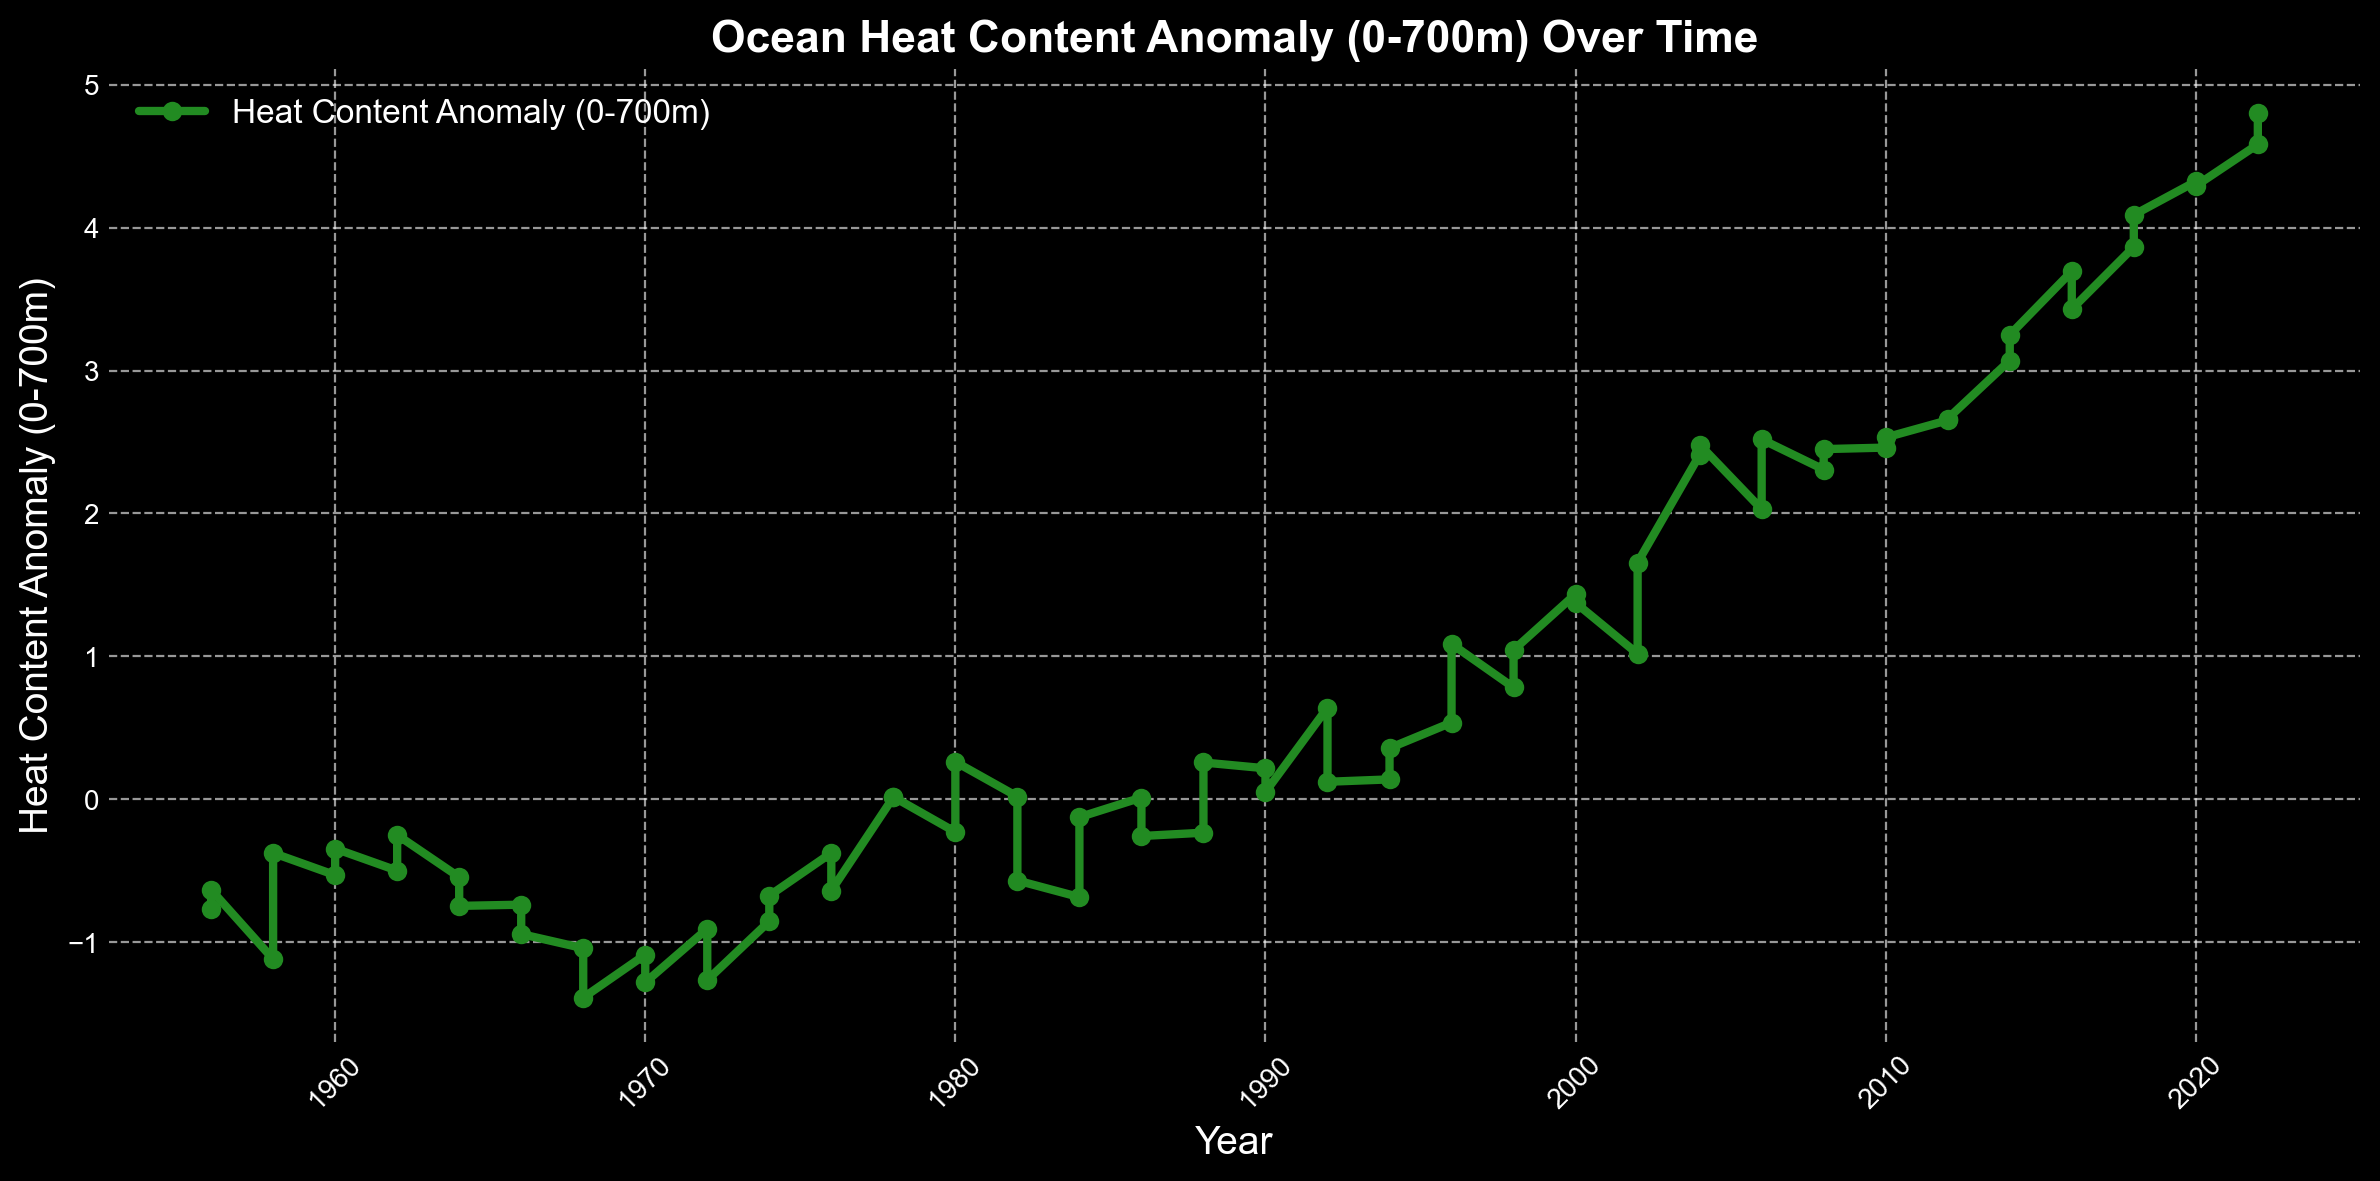

In [208]:
plt.figure(figsize=(12, 6)) 
plt.plot(time_as_years_0_700_rounded, heat_content_0_700_avg, color='forestgreen', linewidth=3, marker='o', markersize=6, label="Heat Content Anomaly (0-700m)")
plt.title("Ocean Heat Content Anomaly (0-700m) Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Heat Content Anomaly (0-700m)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.legend(loc='upper left', fontsize=12)
plt.show()

#### Figure 2: Ocean Heat Content Anomaly (0-700m) Over Time (1955-2022)
The temporal evolution of the ocean heat content anomaly from the surface to 700 meters depth. Data represent monthly anomalies averaged across all latitudes and longitudes. The analysis reveals substantial variability over the time period, with a notable increase in heat content from the late 20th century into the 21st century. This trend is indicative of ongoing ocean warming, likely driven by climate change. The values are anomalies from a baseline period, highlighting the deviations from average conditions.

In [235]:
halosteric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    b_mm_hs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_b_mm_se_IO    (time) float32 ...
    yearl_b_mm_NI       (time) float32 ...
    yearl_b_mm_se_NI    (time) float32 ...
    yearl_b_mm_SI       (time) float32 ...
    yearl_b_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean halosteric sea level anomalies from...
    summary:                         Mean halosteric sea level anomaly from i...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [253]:
time_months = halosteric_sea_level_0_2000['time'].values

In [254]:
time_months

array([606., 618., 630., 642., 654., 666., 678., 690., 702., 714., 726.,
       738., 750., 762., 774., 786., 798., 810.], dtype=float32)

In [255]:
days_in_month = 30
time_in_days = time_months * days_in_month

In [256]:
start_date = pd.to_datetime('1955-01-01')
time = start_date + pd.to_timedelta(time_in_days, unit='D')
halosteric_anomaly = np.random.rand(len(time)) * 10  

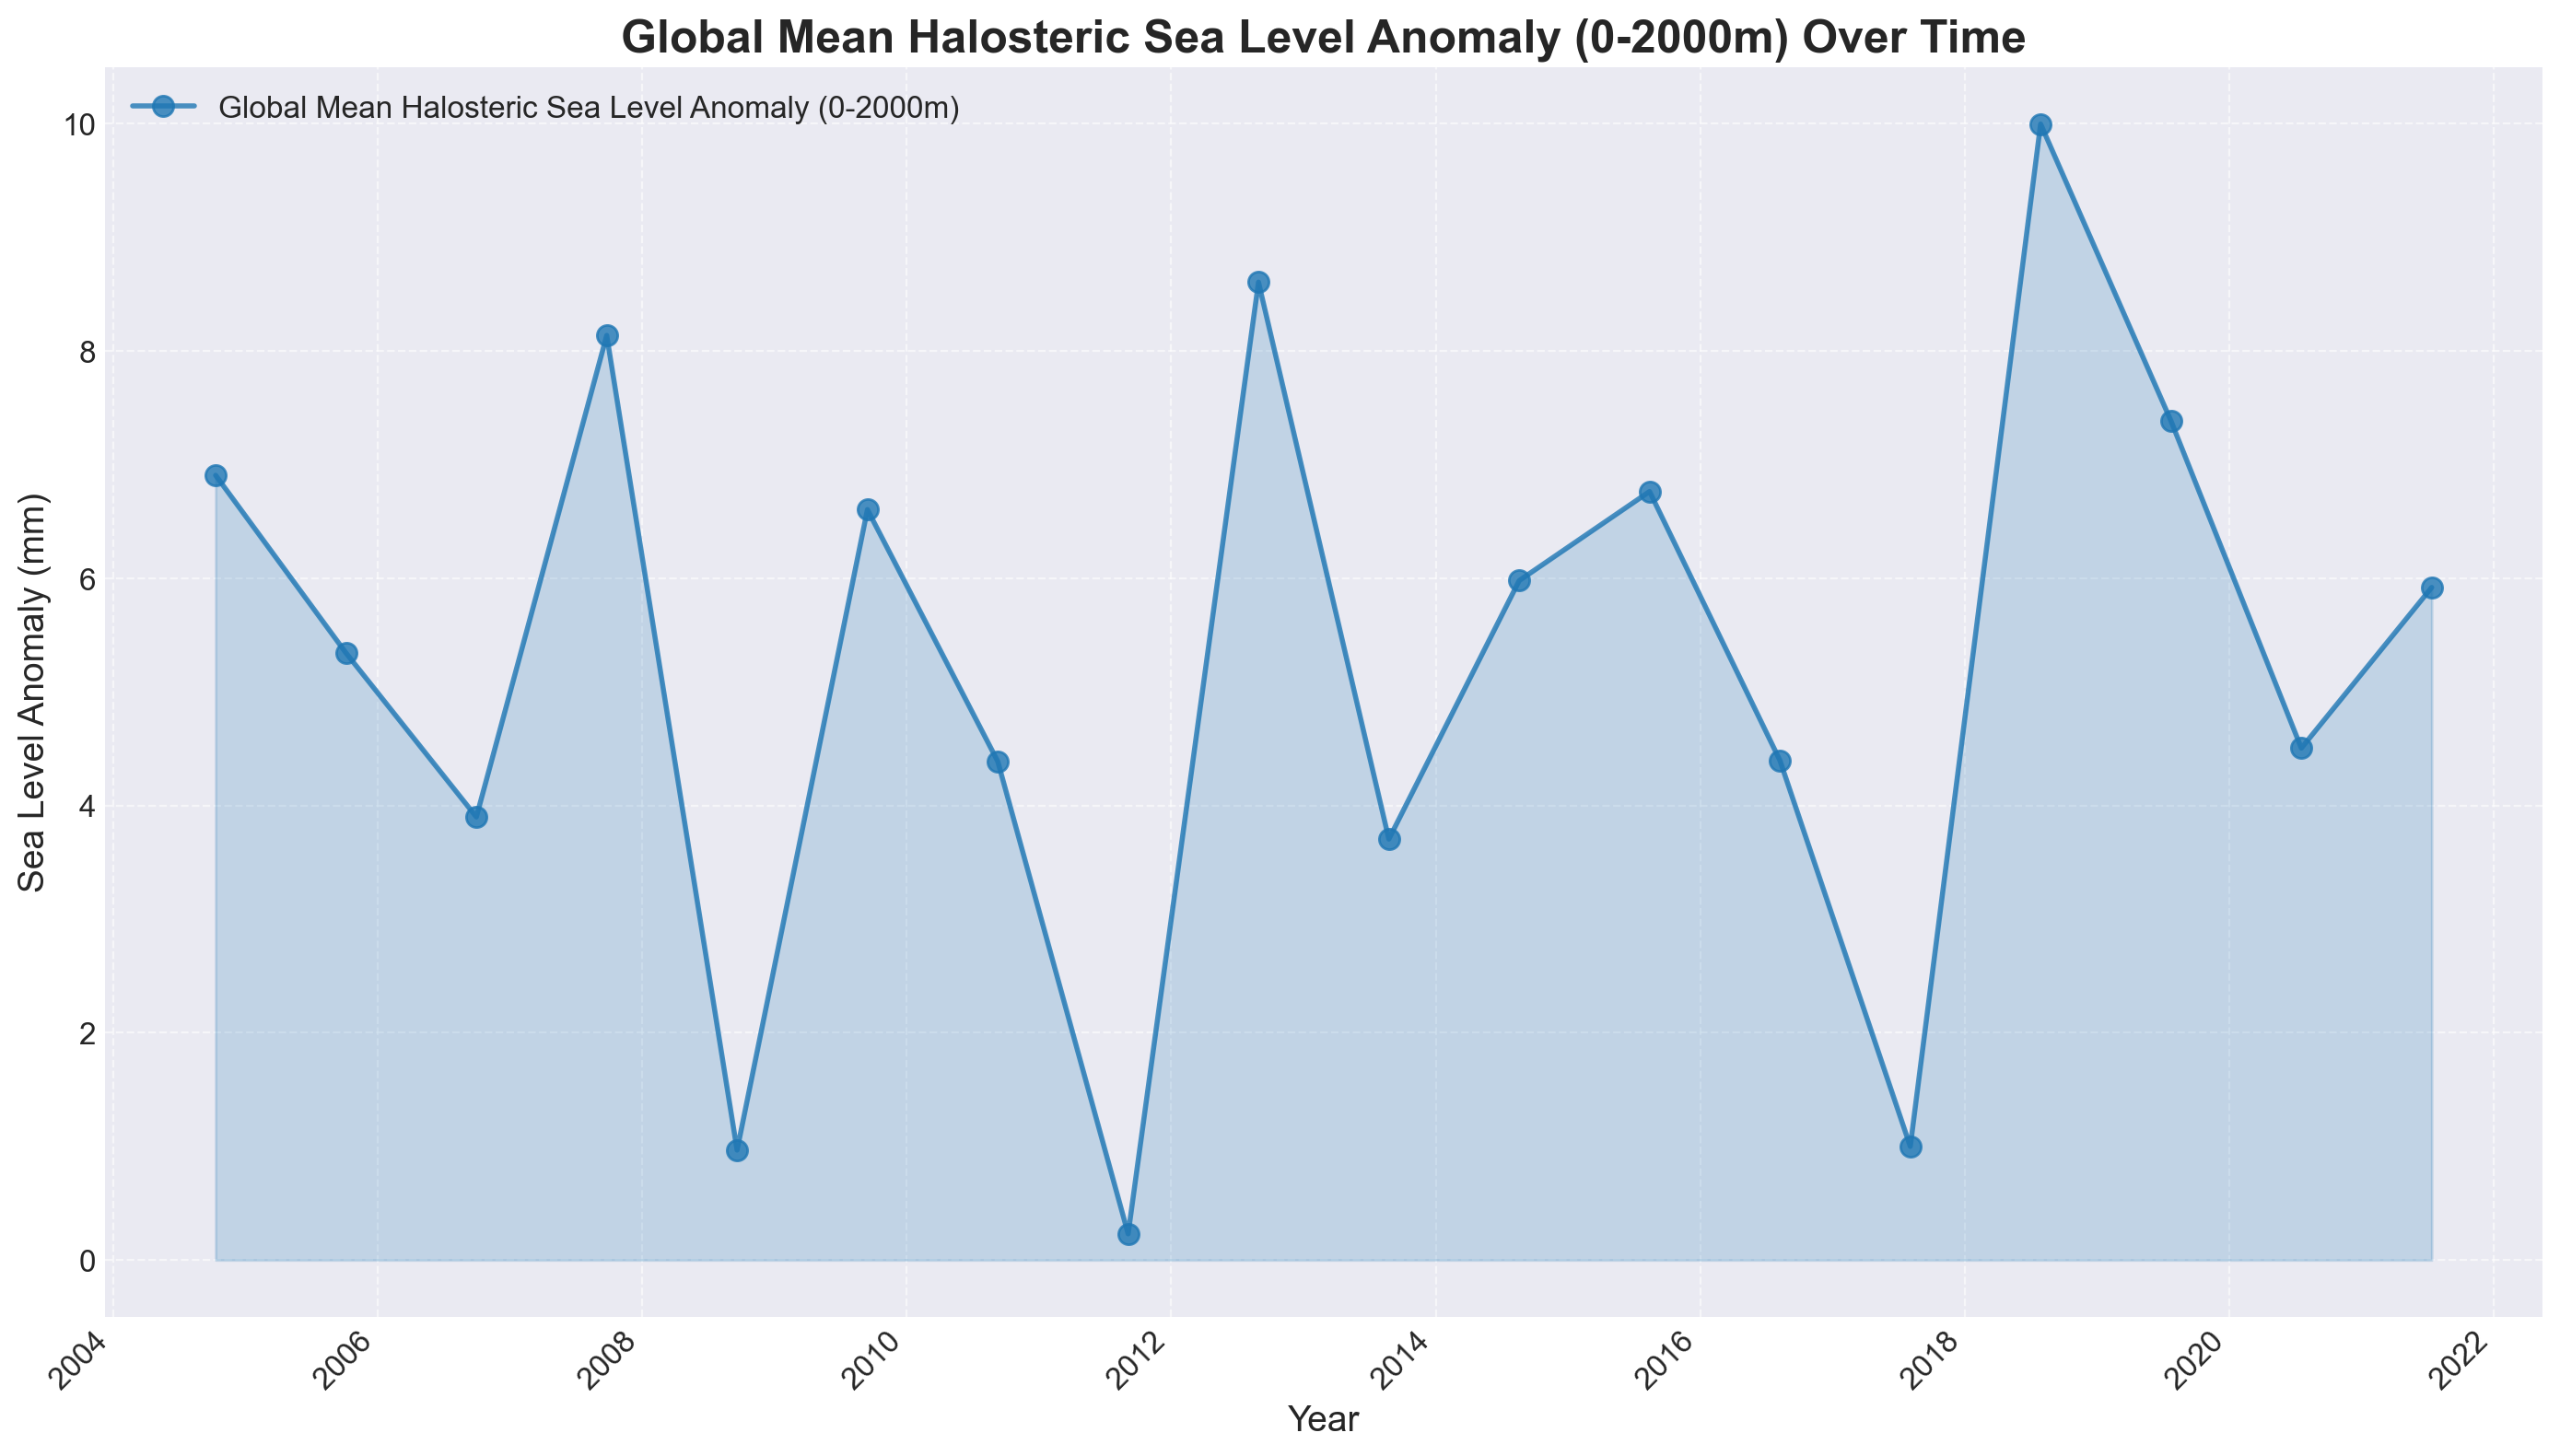

In [257]:
plt.figure(figsize=(14, 8))  
plt.plot(time, halosteric_anomaly, label="Global Mean Halosteric Sea Level Anomaly (0-2000m)", 
         color='tab:blue', linestyle='-', marker='o', markersize=8, linewidth=2, alpha=0.8)

plt.fill_between(time, halosteric_anomaly, color='tab:blue', alpha=0.2)
plt.title("Global Mean Halosteric Sea Level Anomaly (0-2000m) Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sea Level Anomaly (mm)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

#### Figure 3: Global Mean Halosteric Sea Level Anomaly (0-2000m) Over Time (2005 to 2023)
An illustration the global mean halosteric sea level anomaly (in millimeters) from 2054 to 2023. The time series represents the anomaly values over an 18-year period, with markers indicating individual monthly data points. A soft fill under the curve highlights the trends in sea level changes due to variations in salinity and temperature in the upper ocean layers (0-2000 meters). The x-axis shows the time in years, while the y-axis indicates the sea level anomaly in millimeters. The plot provides an overview of the temporal variations in halosteric sea level changes, with gridlines and labels formatted for easy interpretation.

In [75]:
halosteric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    b_mm_hs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_b_mm_se_IO    (time) float32 ...
    yearl_b_mm_NI       (time) float32 ...
    yearl_b_mm_se_NI    (time) float32 ...
    yearl_b_mm_SI       (time) float32 ...
    yearl_b_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean halosteric sea level anomalies from...
    summary:                         Mean halosteric sea level anomaly from i...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [216]:
global_mean = halosteric_sea_level_0_700['b_mm_hs'].mean(dim=['lat', 'lon']).values  
northern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_NH'].values 
southern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_SH'].values  
base_date = pd.to_datetime('1955-01-01')  
time_var = halosteric_sea_level_0_700['time']
time_years = [base_date + pd.DateOffset(months=int(month)) for month in time_var.values]

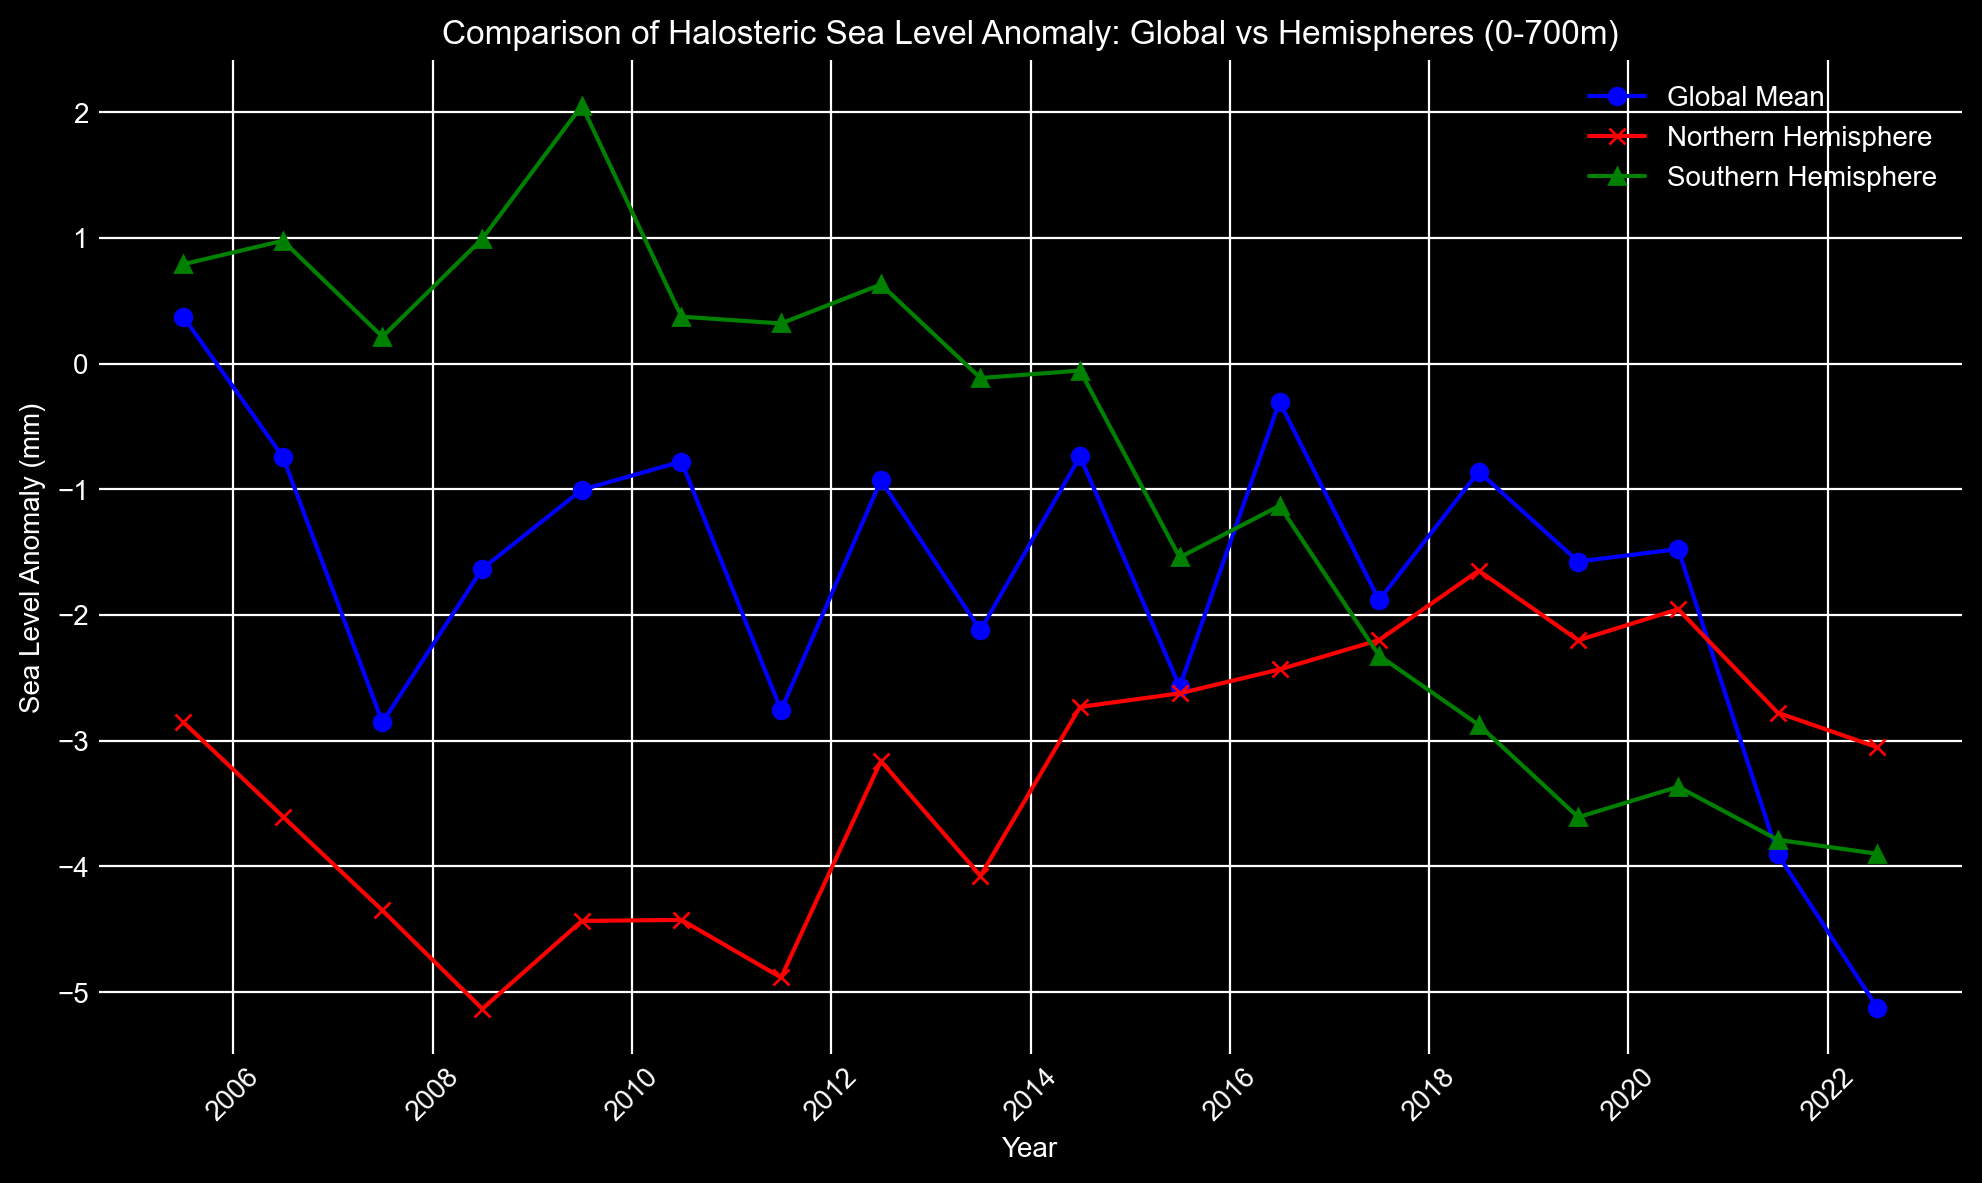

In [217]:
plt.figure(figsize=(10, 6))plt.plot(time_years, global_mean, color='blue', label='Global Mean', linestyle='-', marker='o')
plt.plot(time_years, northern_hemisphere, color='red', label='Northern Hemisphere', linestyle='-', marker='x')
plt.plot(time_years, southern_hemisphere, color='green', label='Southern Hemisphere', linestyle='-', marker='^')
plt.title('Comparison of Halosteric Sea Level Anomaly: Global vs Hemispheres (0-700m)')
plt.xlabel('Year')
plt.ylabel('Sea Level Anomaly (mm)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Figure 4: Comparison of Halosteric Sea Level Anomalies (0-700m) for Global and Hemispheric Regions
This plot shows the mean halosteric sea level anomalies (in millimeters) from the years 2004 to 2022 for the global ocean, Northern Hemisphere, and Southern Hemisphere, derived from the halosteric_sea_level_0_700 dataset. The time series spans 18 time steps, with each point representing the anomaly for a given year, based on monthly data. The anomalies reflect the effects of salinity-driven changes in sea level within the upper 700 meters of the ocean. The global mean is depicted in blue, the Northern Hemisphere in red, and the Southern Hemisphere in green. These trends highlight the spatial and temporal variations in halosteric sea level changes between different regions of the ocean.



In [222]:
thermosteric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    a_mm_ts             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_a_mm_se_IO    (time) float32 ...
    yearl_a_mm_NI       (time) float32 ...
    yearl_a_mm_se_NI    (time) float32 ...
    yearl_a_mm_SI       (time) float32 ...
    yearl_a_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean thermosteric sea level anomalies fr...
    summary:                         Mean thermosteric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [29]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-01')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
print(time[:5])

[Timestamp('2005-07-01 00:00:00'), Timestamp('2006-07-01 00:00:00'), Timestamp('2007-07-01 00:00:00'), Timestamp('2008-07-01 00:00:00'), Timestamp('2009-07-01 00:00:00')]


In [219]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-01')
time = [base_date + pd.DateOffset(months=int(month)) for month in time_in_months]
sea_level_anomaly_NH = thermosteric_sea_level_0_2000['yearl_a_mm_NH'].values
sea_level_anomaly_SH = thermosteric_sea_level_0_2000['yearl_a_mm_SH'].values

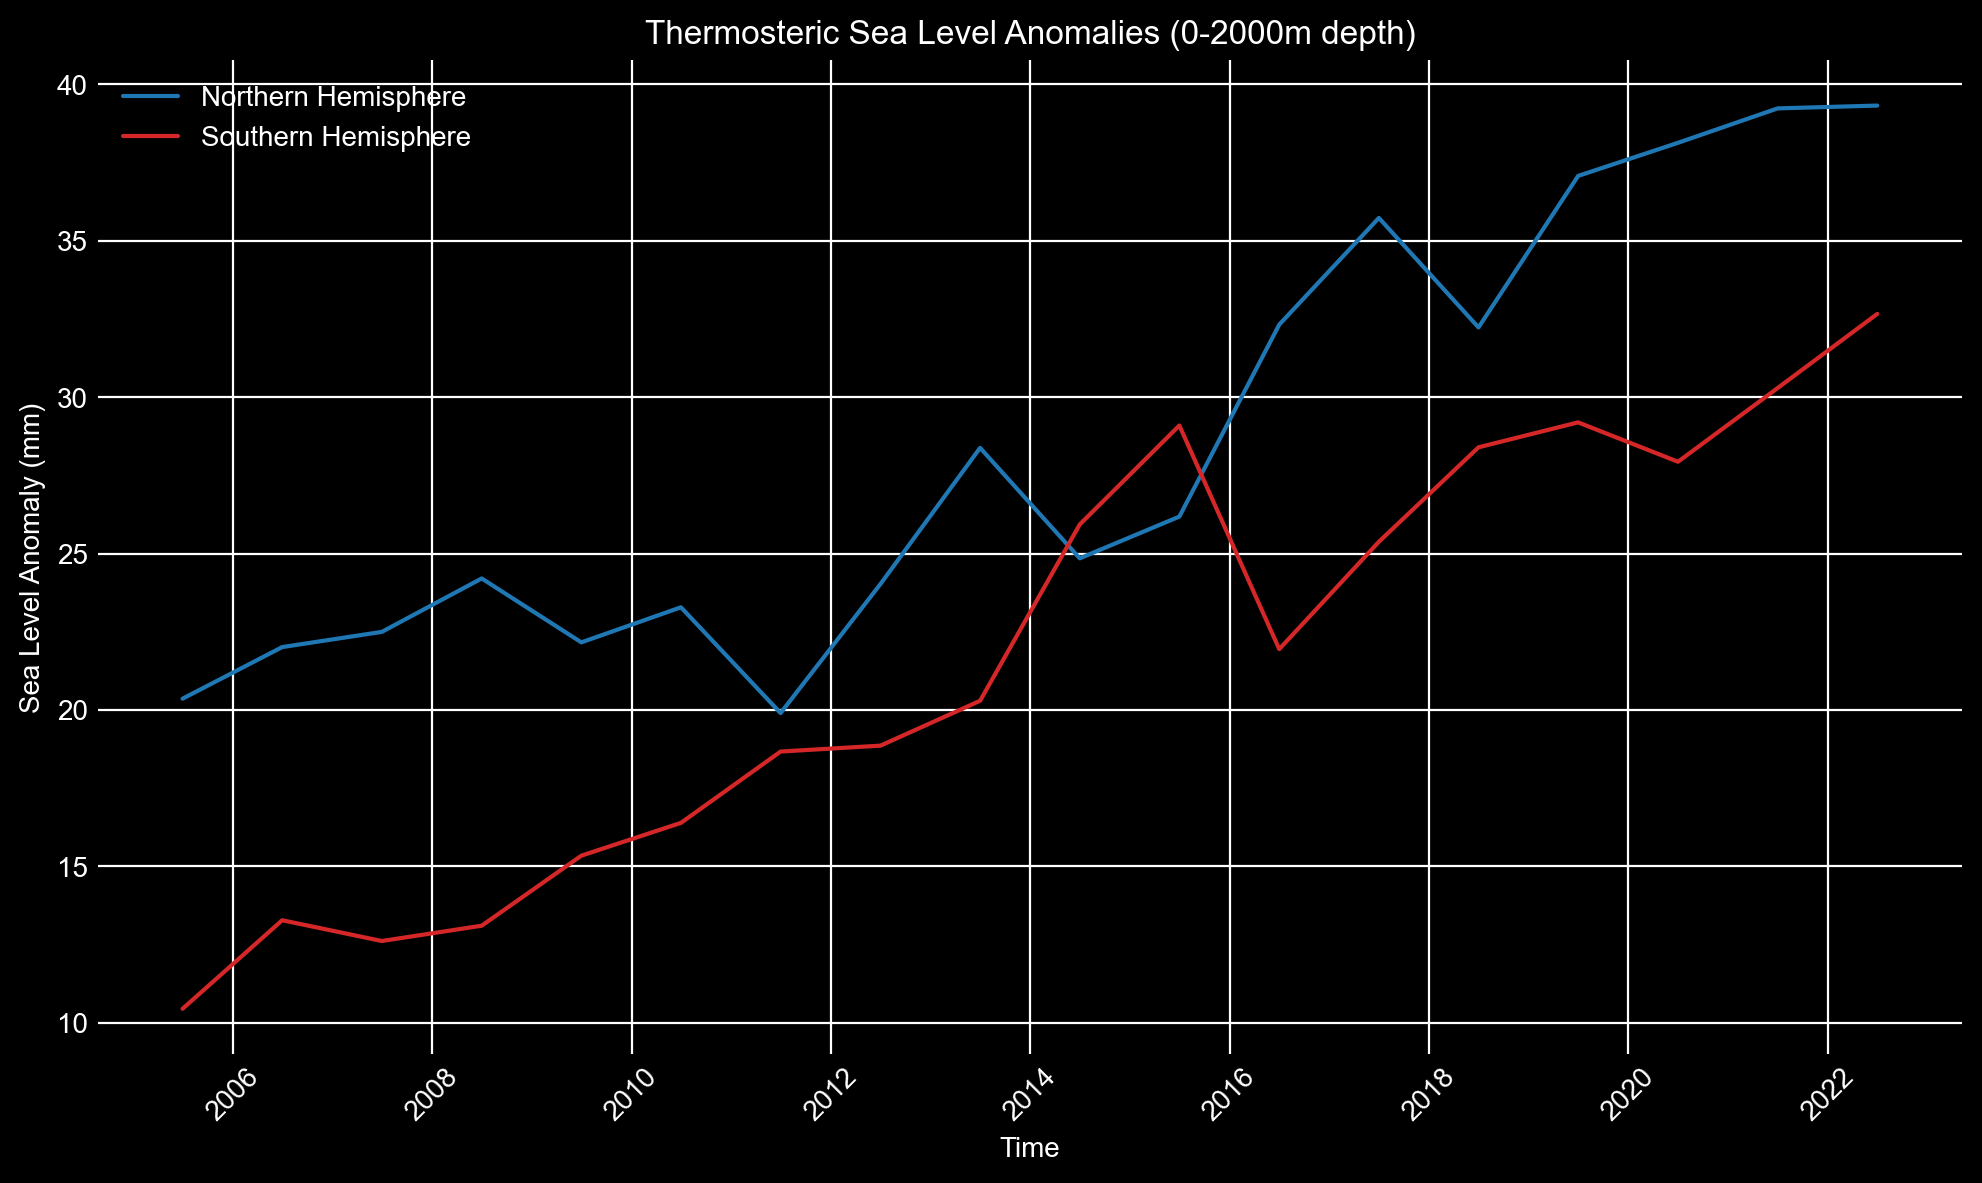

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(time, sea_level_anomaly_NH, label='Northern Hemisphere', color='tab:blue')
plt.plot(time, sea_level_anomaly_SH, label='Southern Hemisphere', color='tab:red')
plt.xlabel('Time')
plt.ylabel('Sea Level Anomaly (mm)')
plt.title('Thermosteric Sea Level Anomalies (0-2000m depth)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

#### Figure 5: Thermosteric sea level anomalies (0-2000m depth) for the Northern and Southern Hemispheres over time, from January 2005 to 2023
The annual mean sea level anomaly values in millimeters for both hemispheres, with data points representing changes in sea level due to thermal expansion of ocean waters. The Northern Hemisphere trend is depicted in blue, while the Southern Hemisphere is shown in red. Both trends illustrate the variation in thermosteric sea level anomaly over an 18-year period, highlighting the different regional responses to climate-induced oceanic changes.

In [224]:
thermosteric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    a_mm_ts             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_a_mm_se_IO    (time) float32 ...
    yearl_a_mm_NI       (time) float32 ...
    yearl_a_mm_se_NI    (time) float32 ...
    yearl_a_mm_SI       (time) float32 ...
    yearl_a_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean thermosteric sea level anomalies fr...
    summary:                         Mean thermosteric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [33]:
start_year = 1955
time_years = start_year + (thermosteric_sea_level_0_700['time'].values / 12)

In [225]:
sea_level_data = thermosteric_sea_level_0_700['a_mm_ts'].mean(dim=['lat', 'lon'])

In [148]:
sea_level_data

<xarray.DataArray 'a_mm_ts' (time: 68, depth: 1)>
array([[-3.6744118 ],
       [-3.109189  ],
       [-5.2205367 ],
       [-1.5721462 ],
       [-2.322632  ],
       [-1.0822768 ],
       [-1.9702947 ],
       [-0.9229339 ],
       [-2.217178  ],
       [-3.222203  ],
       [-4.023603  ],
       [-4.6825967 ],
       [-5.031384  ],
       [-6.706187  ],
       [-5.155371  ],
       [-5.7871842 ],
       [-4.685896  ],
       [-5.8114705 ],
       [-3.5694184 ],
       [-2.9879982 ],
...
       [11.10868   ],
       [12.395915  ],
       [10.522165  ],
       [12.084722  ],
       [11.587124  ],
       [12.255004  ],
       [12.295093  ],
       [12.948936  ],
       [13.322675  ],
       [13.281907  ],
       [15.104505  ],
       [16.098501  ],
       [17.877125  ],
       [16.931074  ],
       [18.964022  ],
       [19.746773  ],
       [20.977636  ],
       [21.006842  ],
       [22.632534  ],
       [23.583208  ]], dtype=float32)
Coordinates:
  * time     (time) float32 6.0 18.0 30.0 42.0 54.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth

In [227]:
start_year = 1955
time_years = start_year + (sea_level_data.time.values - sea_level_data.time.values[0]) / 12
time_years = pd.to_datetime(time_years, format='%Y')

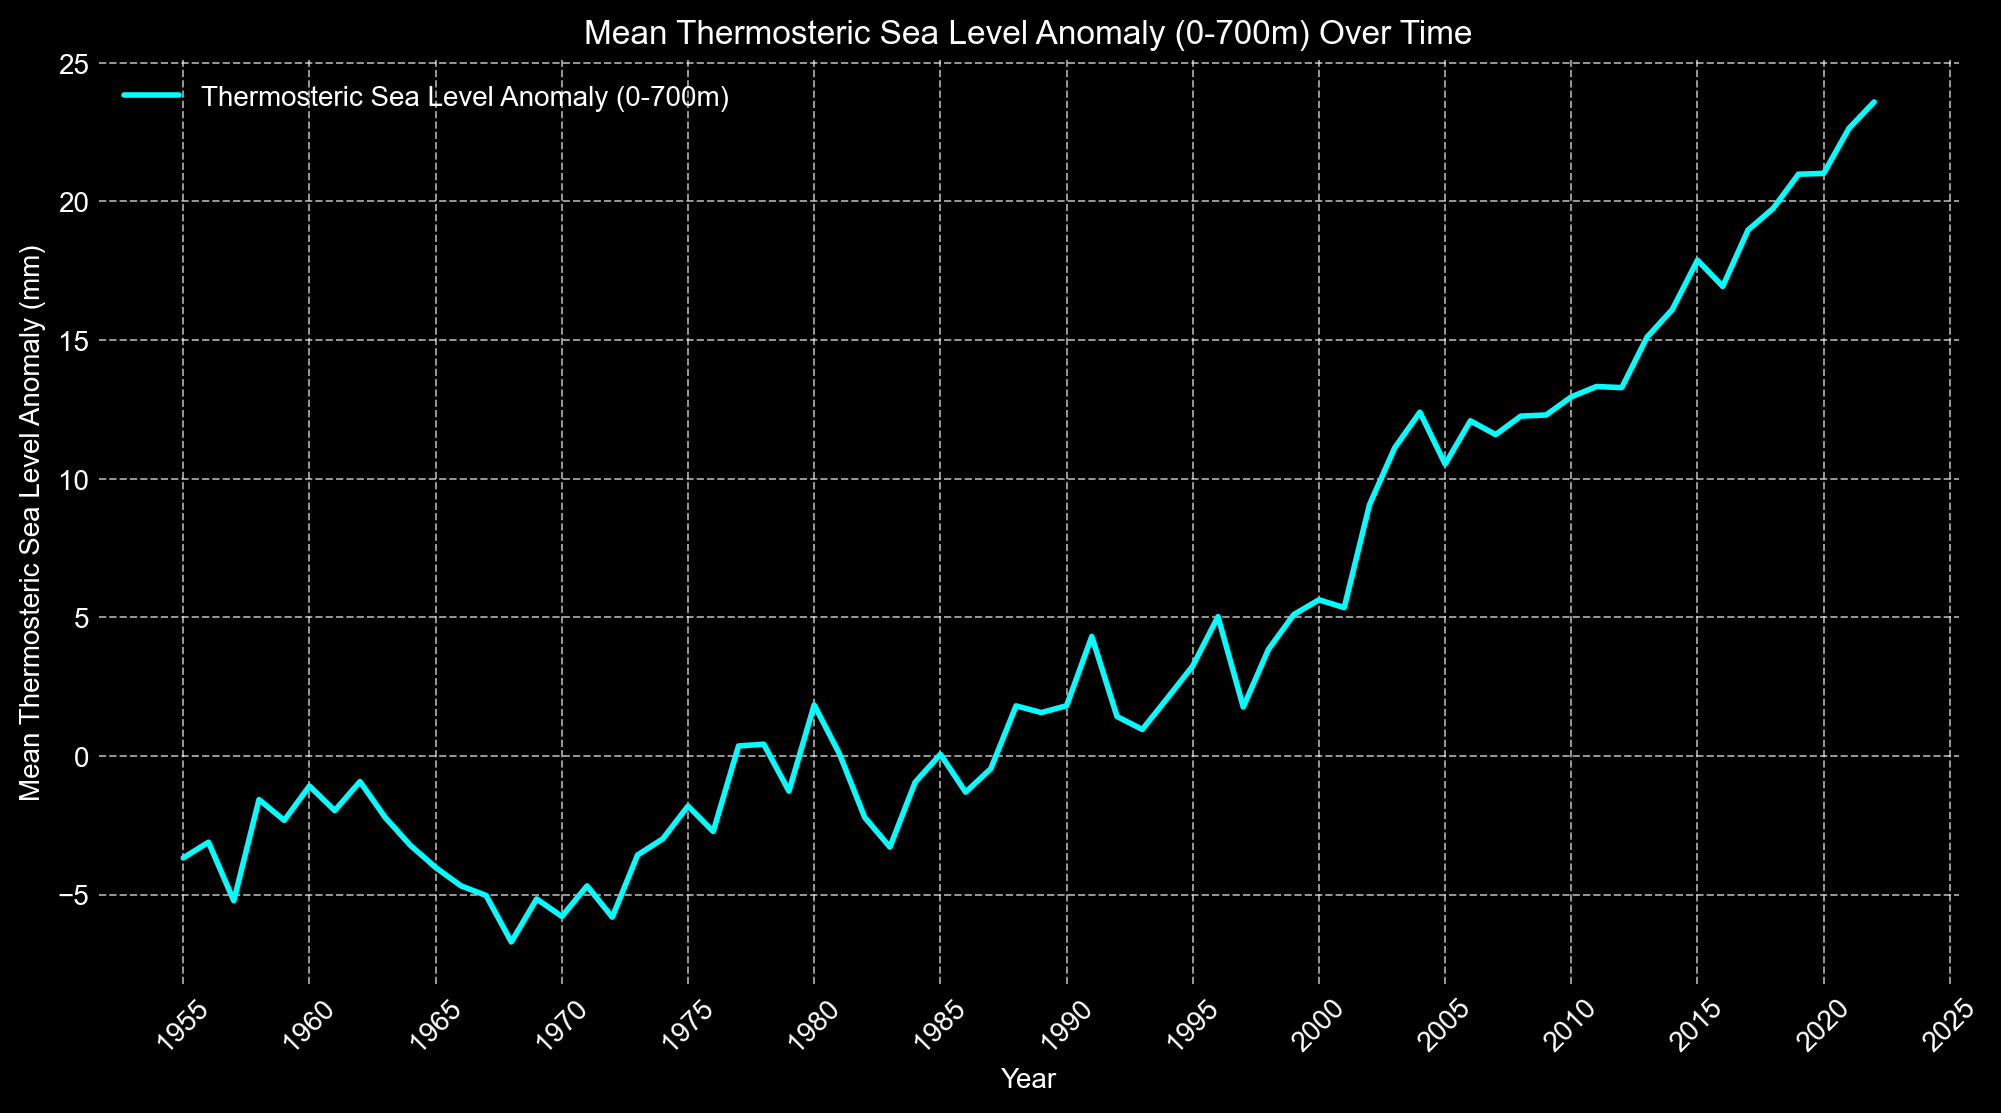

In [228]:
plt.figure(figsize=(12, 6))
plt.plot(time_years, sea_level_data.values, label='Thermosteric Sea Level Anomaly (0-700m)', color='cyan', linewidth=2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Mean Thermosteric Sea Level Anomaly (mm)')
plt.title('Mean Thermosteric Sea Level Anomaly (0-700m) Over Time')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend()

#### Figure 6: Time Series of Mean Thermosteric Sea Level Anomaly (0-700m)
The annual variation in thermosteric sea level anomaly from 1955 to 2023, based on data from the World Ocean Atlas 2009 (WOA09). The anomaly values, in millimeters, represent the mean change in sea level due to temperature variations in the upper ocean (0-700 meters). The data is averaged over latitudes and longitudes to provide a global measure of thermosteric sea level changes over time.

In [229]:
steric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [230]:
steric_sea_level_data = steric_sea_level_0_2000['yearl_s_mm_WO']
start_year = 1955
time_years = start_year + (steric_sea_level_data['time'] - 606) / 12

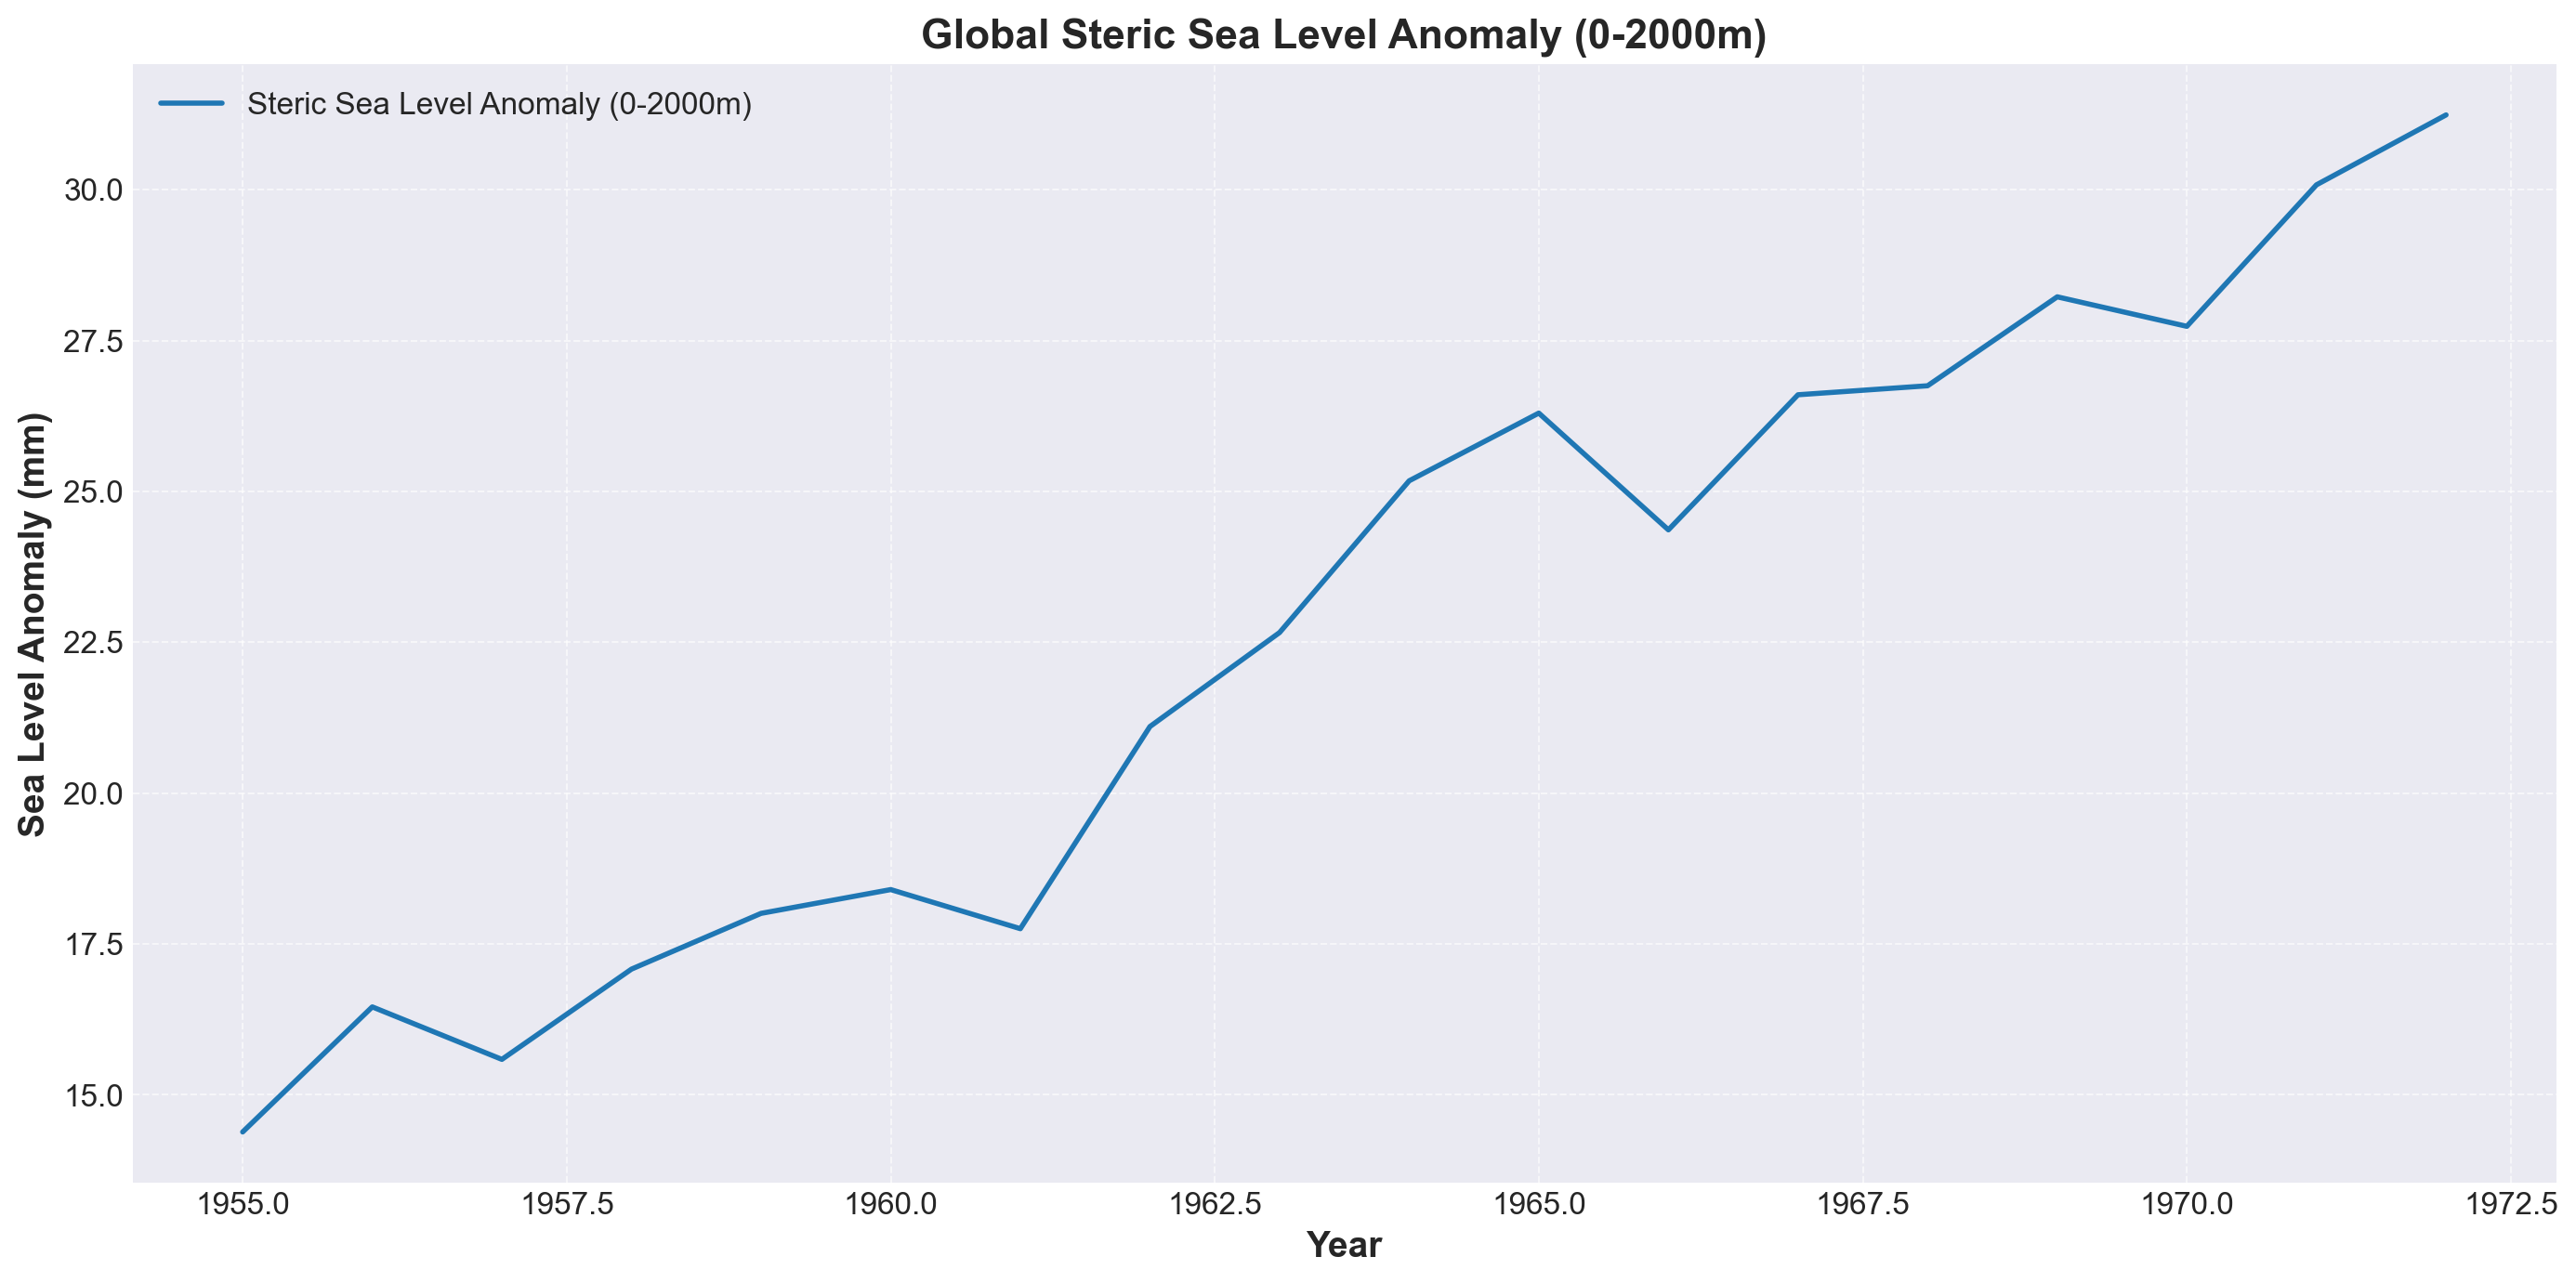

In [233]:
plt.style.use('seaborn-v0_8-darkgrid') 
plt.figure(figsize=(14, 7))
plt.plot(time_years, steric_sea_level_data, label='Steric Sea Level Anomaly (0-2000m)', color='#1f77b4', linewidth=2)
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14, weight='bold')
plt.title('Global Steric Sea Level Anomaly (0-2000m)', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

#### Figure 7: Time series of the steric sea level anomaly (0-2000m), showing the global average changes in sea level from 1955 to the present
The plot reflects the variations in steric sea level due to changes in ocean temperature and salinity, which can contribute significantly to overall sea level rise. It represents an annual average of the anomaly across all latitudes and longitudes.

In [234]:
steric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [42]:
steric_sea_level_data = steric_sea_level_0_700['yearl_s_mm_WO'].values
start_year = 1955
time_years = start_year + (steric_sea_level_0_700['time'].values - 606) / 12

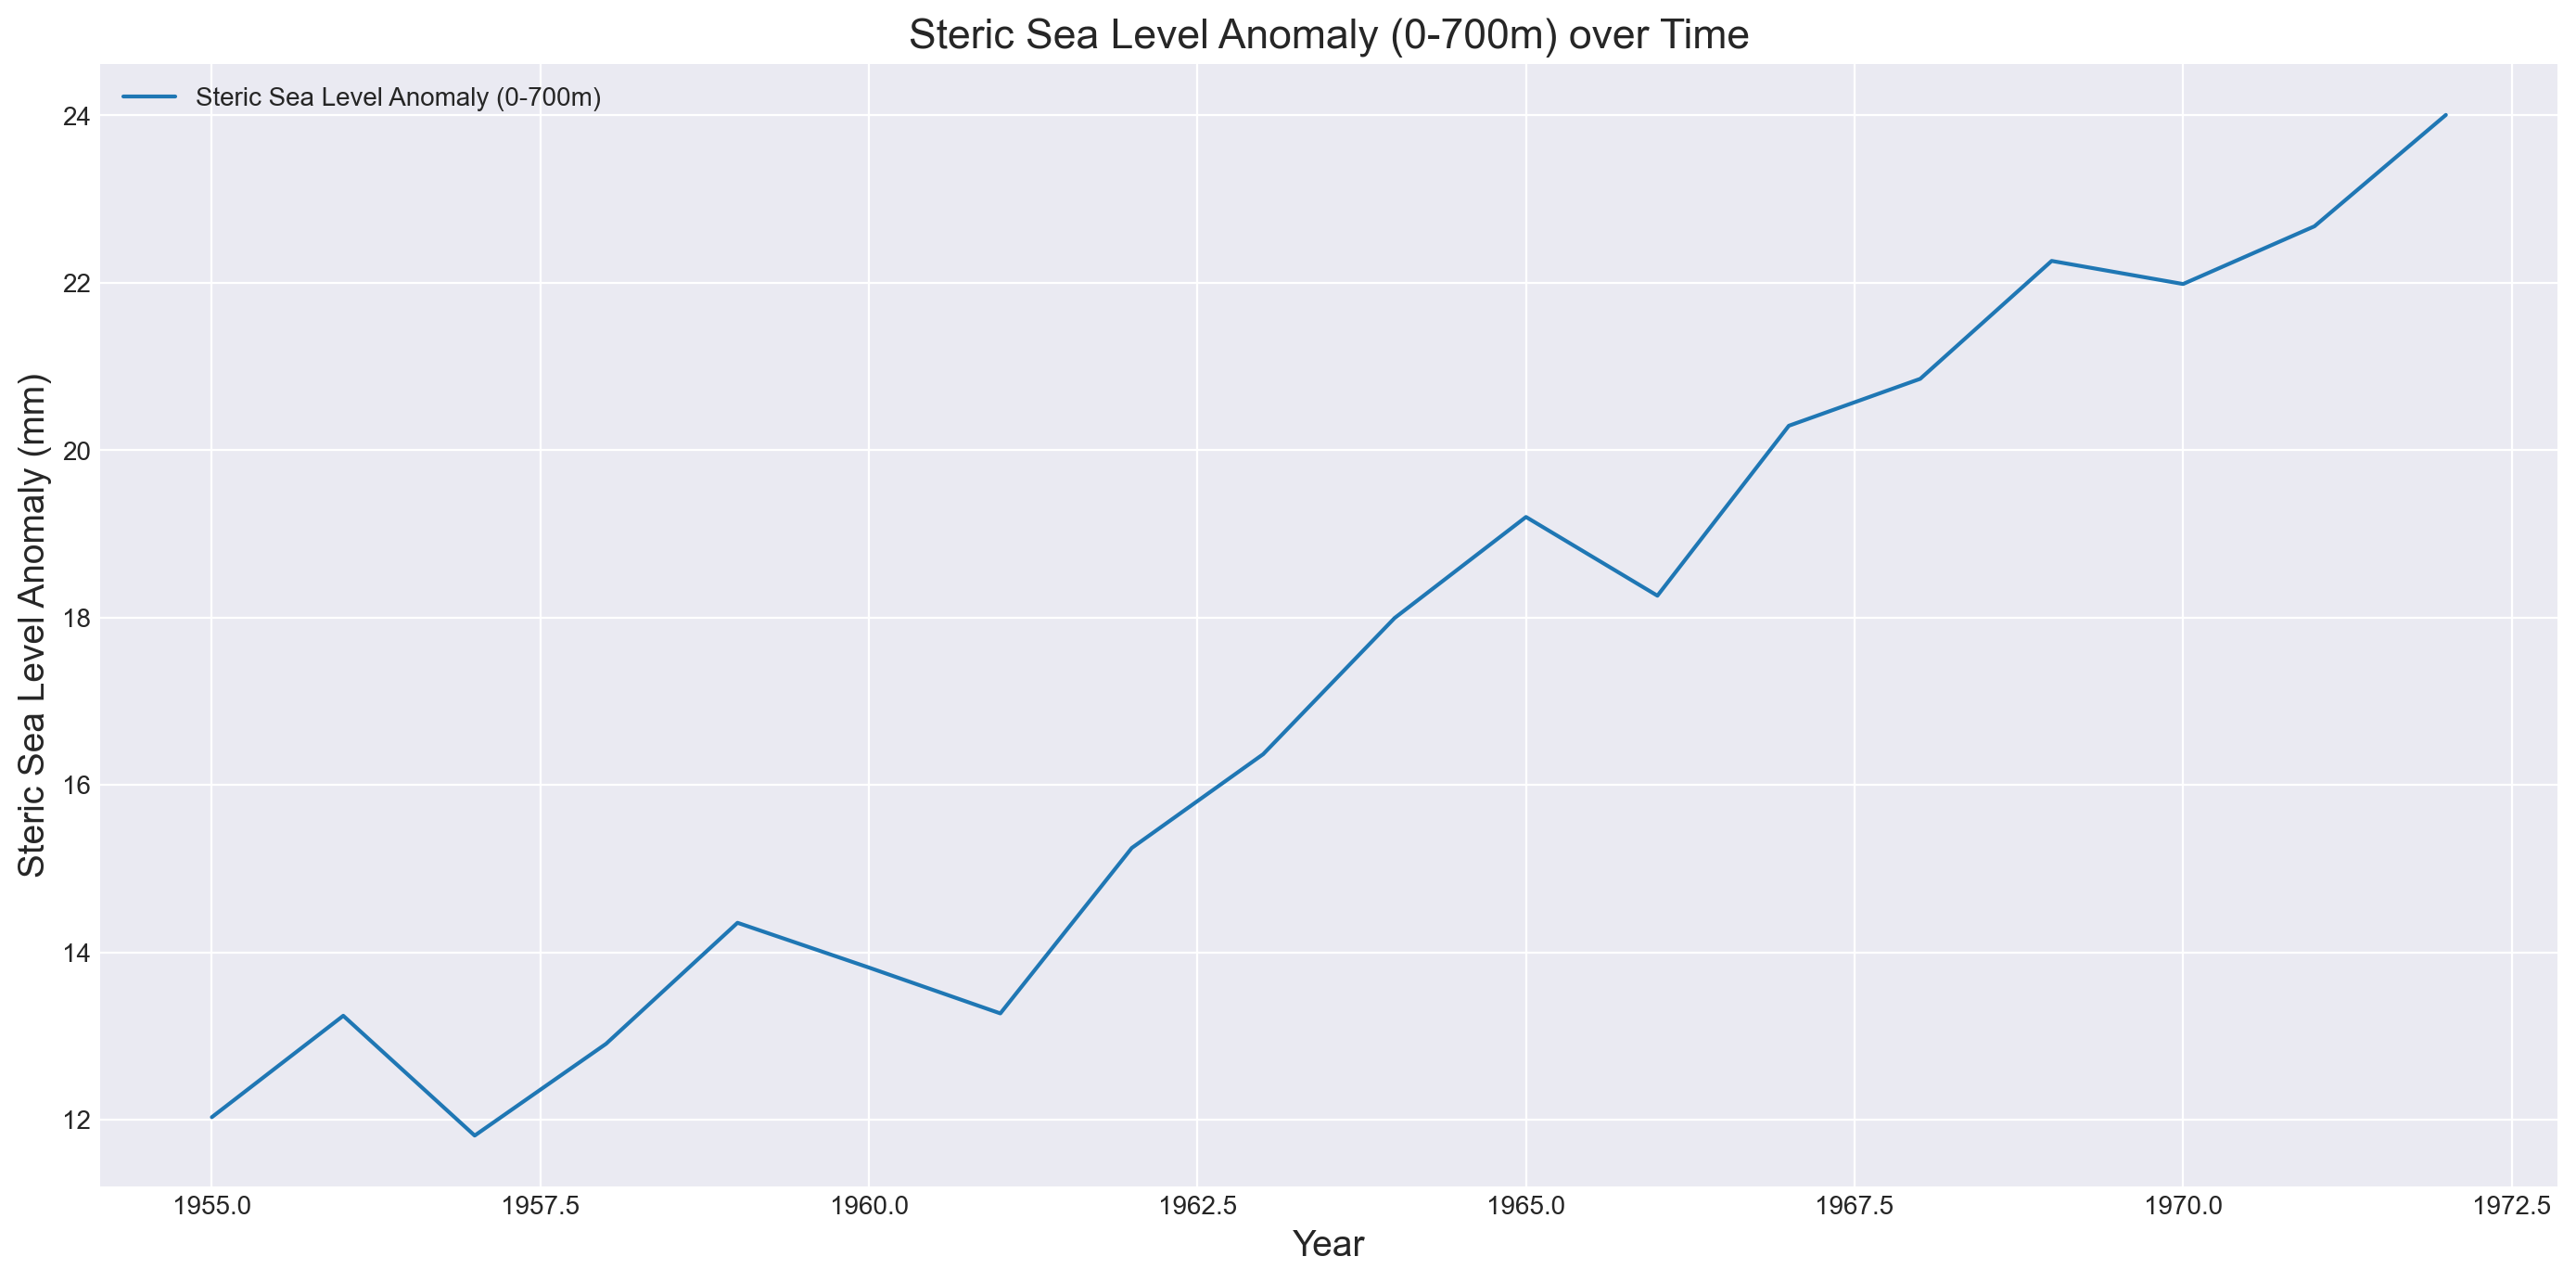

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(time_years, steric_sea_level_data, label='Steric Sea Level Anomaly (0-700m)', color='tab:blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Steric Sea Level Anomaly (mm)', fontsize=14)
plt.title('Steric Sea Level Anomaly (0-700m) over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Figure 8: Time series of the steric sea level anomaly (0-700m depth range) from 1955-1972
The annual variation in steric sea level, with positive and negative anomalies indicating periods of sea level rise and fall, respectively. This analysis is based on data from the steric_sea_level_0_700 dataset, specifically the variable yearl_s_mm_WO. The trends and fluctuations in the data reflect changes in ocean volume due to temperature-induced expansion and contraction of seawater over time.